# LABORATORIO 9: CAMPO MAGNÉTICO PRODUCIDO POR LA CORRIENTE DE UN CABLE RECTO LARGO

### Fórmula para hallar el campo magnético
### $$B = \frac{\mu_{0} I}{2\pi r}$$
### El valor de la permeabilidad magnética
### $$\mu_{0} = 4πx10^{-7}[H/m]$$

Importando librerias necesarias.

In [1]:
from __future__ import annotations

import cufflinks
from pandas import DataFrame, read_csv as readcsv
from matplotlib import pyplot as plt
import numpy as np
import six

Función para graficar la tabla de datos obtenidos desde el simulador.

In [2]:
def table(
    data: DataFrame,
    colwidth: int | float = 3.0,
    rowheight: int | float = 0.625,
    fontsize: int | float = 14,
    headercolor: str = '#40466e',
    rowcolors: list[str] = None,
    edgecolor: str = 'w',
    bbox: list[int] = None,
    headercolumns: int = 0,
    ax = None,
    **kwargs
):
    if bbox is None:
        bbox = [0, 0, 1, 1]
    if rowcolors is None:
        rowcolors = ['#f1f1f2', 'w']
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([colwidth, rowheight])
        fig, ax = plt.subplots(figsize = size)
        ax.axis('off')

    mtable = ax.table(cellText = data.values, bbox = bbox, colLabels = data.columns, **kwargs)

    mtable.auto_set_font_size(False)
    mtable.set_fontsize(fontsize)

    for k, cell in six.iteritems(mtable.get_celld()):
        cell.set_edgecolor(edgecolor)
        if k[0] == 0 or k[1] < headercolumns:
            cell.set_text_props(weight = 'bold', color = 'w')
            cell.set_facecolor(headercolor)
        else:
            cell.set_facecolor(rowcolors[k[0] % len(rowcolors)])
    plt.show()

In [3]:
cufflinks.set_config_file(sharing = 'public', theme = 'space', offline = False)

Definiendo el número pi y la constante MU.

In [4]:
PI = np.pi
MU = 4 * np.pi * 1e-7

# Actividad 1: Estudio del campo magnético en función de la corriente.

### b) Deje fijo la distancia al hilo (punto P) y la longitud del hilo. Verifique el valor del B que lee el simulador y grafique el campo magnético en función de la intensidad de la corriente que circula por el hilo. Tome r = 0,7 m
### Para radio igual a: $0.7012[m]$

![si](../images/R1/Vectores.png)

Creando un objeto de tipo DataFrame, donde se pasa como parámetro un archivo csv que contiene los datos obtenidos. Seguidamente, se calcula el campo magnetico con la fórmula.

In [5]:
df1 = DataFrame(readcsv('../models/0m7012.csv'))
R1 = 0.7012
for i in range(len(df1)):
    B = (MU * df1.loc[i, 'I[A]']) / (2 * PI * R1)
    df1.loc[i, 'calculado B[T]'] = round(B, 12)

Mostrando la tabla de datos simulados como calculados.

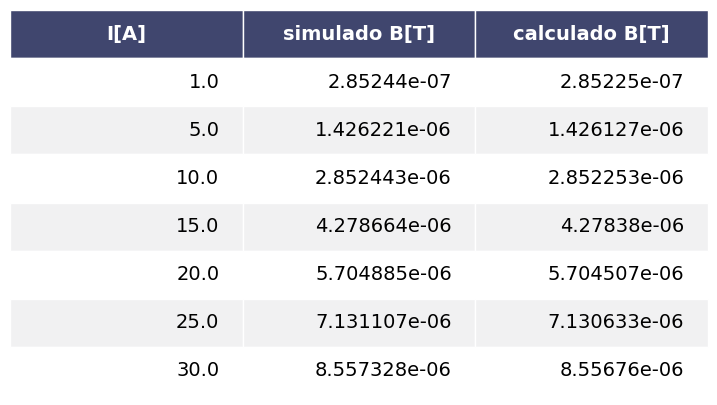

In [6]:
table(df1)

### Gráfica para valores simulados

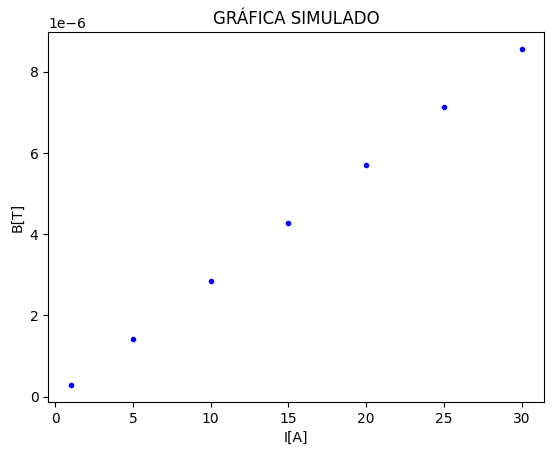

In [7]:
plt.plot(
    df1["I[A]"], df1["simulado B[T]"], 'b.',
)
plt.xlabel("I[A]")
plt.ylabel("B[T]")
plt.title("GRÁFICA SIMULADO")
plt.ion()
plt.show()

### Gráfica para valores calculados

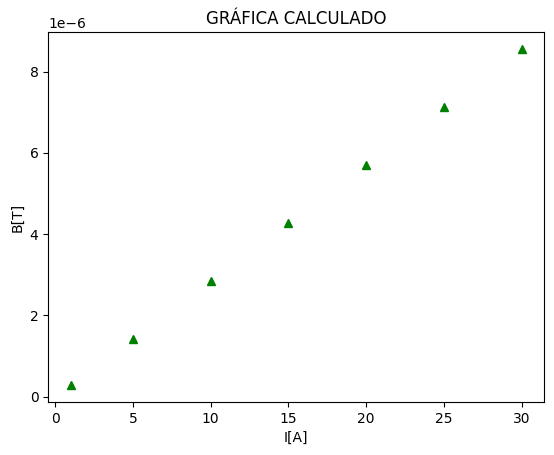

In [8]:
plt.plot(
    df1["I[A]"], df1["calculado B[T]"], 'g^'
)
plt.xlabel("I[A]")
plt.ylabel("B[T]")
plt.title("GRÁFICA CALCULADO")
plt.ion()
plt.show()

### c) Cambie el radio por lo menos tres veces y repita el procedimiento anterior. Grafique en un solo plano cartesiano el campo magnético en función de la corriente para los tres radios diferéncielas por colores.
### Para radio igual a: $0.9004[m]$

![si](../images/R4/Vectores.png)

Creando un objeto de tipo DataFrame, donde se pasa como parámetro un archivo csv que contiene los datos obtenidos. Seguidamente, se calcula el campo magnetico con la fórmula.

In [9]:
df22 = DataFrame(readcsv('../models/0m9004.csv'))
R22 = 0.9004
for i in range(len(df22)):
    B = (MU * df22.loc[i, 'I[A]']) / (2 * PI * R22)
    df22.loc[i, 'calculado B[T]'] = round(B, 12)

Mostrando en la tabla de datos.

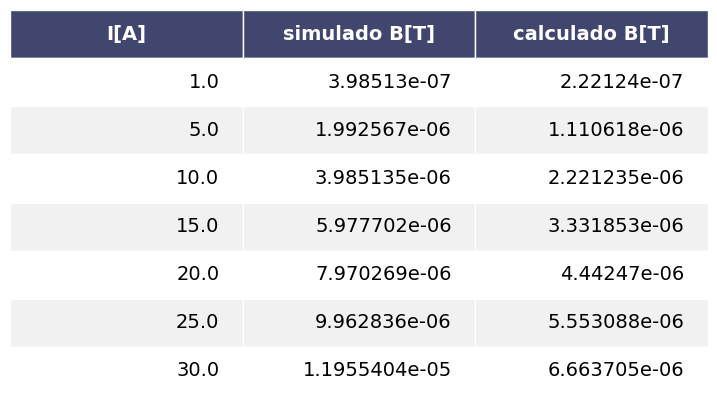

In [10]:
table(df22)

### Para radio igual a: $0.5019[m]$

![si](../images/R2/Vectores.png)

Creando un objeto de tipo DataFrame, donde se pasa como parámetro un archivo csv que contiene los datos obtenidos. Seguidamente, se calcula el campo magnetico con la fórmula.

In [11]:
df2 = DataFrame(readcsv('../models/0m5019.csv'))
R2 = 0.5019
for i in range(len(df2)):
    B = (MU * df2.loc[i, 'I[A]']) / (2 * PI * R2)
    df2.loc[i, 'calculado B[T]'] = round(B, 12)

Mostrando la tabla.

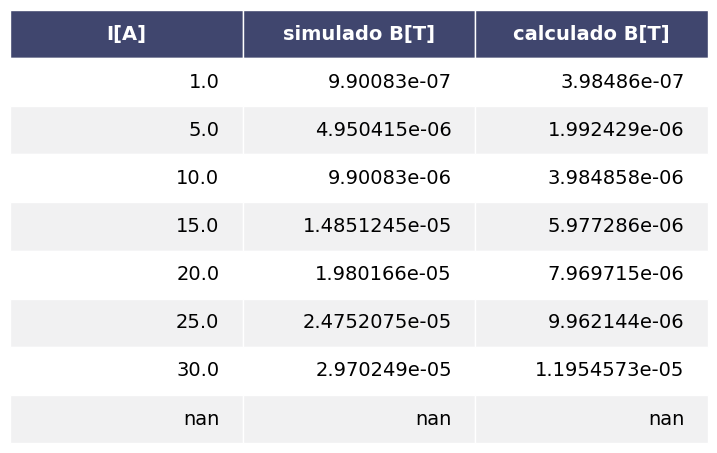

In [12]:
table(df2)

### Para radio igual a: $0.202[m]$

![si](../images/R3/Vectores.png)

Creando un objeto de tipo DataFrame, donde se pasa como parámetro un archivo csv que contiene los datos obtenidos. Seguidamente, se calcula el campo magnetico con la fórmula.

In [13]:
df3 = DataFrame(readcsv('../models/0m2020.csv'))
R3 = 0.202
for i in range(len(df3)):
    B = (MU * df3.loc[i, 'I[A]']) / (2 * PI * R3)
    df3.loc[i, 'calculado B[T]'] = round(B, 12)

Mostrando la tabla.

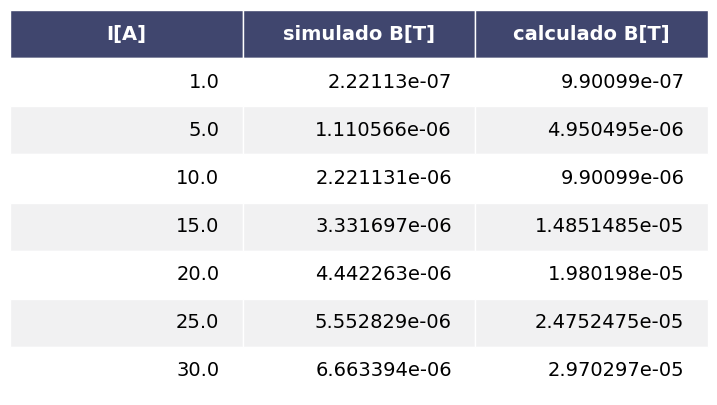

In [14]:
table(df3)

### Gráfica para
### - color verde: $r = 0.9004[m]$
### - color rojo: $r = 0.5019[m]$
### - color azul: $r = 0.202[m]$

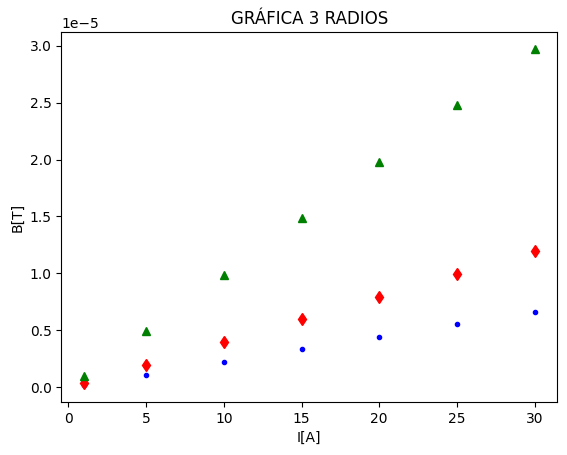

In [15]:
plt.plot(
    df22["I[A]"], df22["calculado B[T]"], 'b.',
    df2["I[A]"], df2["calculado B[T]"], 'rd',
    df3["I[A]"], df3["calculado B[T]"], 'g^',
)
plt.xlabel("I[A]")
plt.ylabel("B[T]")
plt.title("GRÁFICA 3 RADIOS")
plt.ion()
plt.show()

# Actividad 2: Estudio del campo magnético en función del radio

### Para una corriente igual a: $20[A]$

![si](../images/AMP20/Vectores.png)

Creando un objeto de tipo DataFrame, donde se pasa como parámetro un archivo csv que contiene los datos obtenidos. Seguidamente, se calcula el campo magnetico con la fórmula.

In [16]:
df4 = DataFrame(readcsv("../models/20A.csv"))
I1 = 20
for i in range(len(df4)):
    B = (MU * I1) / (2 * PI * df4.loc[i, 'r[m]'])
    df4.loc[i, 'calculado B[T]'] = round(B, 12)


Mostrando la tabla.

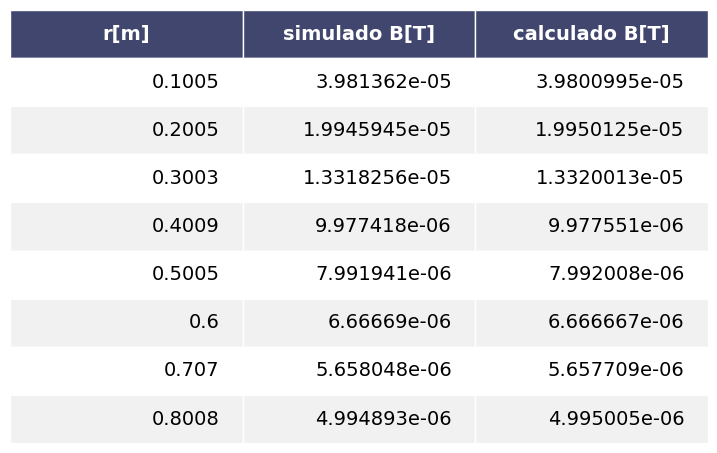

In [17]:
table(df4)

### Para una corriente igual a: $25[A]$

![si](../images/AMP25/Vectores.png)

Creando un objeto de tipo DataFrame, donde se pasa como parámetro un archivo csv que contiene los datos obtenidos. Seguidamente, se calcula el campo magnetico con la fórmula.

In [18]:
df5 = DataFrame(readcsv("../models/25A.csv"))
I2 = 25
for i in range(len(df5)):
    B = (MU * I2) / (2 * PI * df5.loc[i, 'r[m]'])
    df5.loc[i, 'calculado B[T]'] = round(B, 12)

Mostrando la tabla.

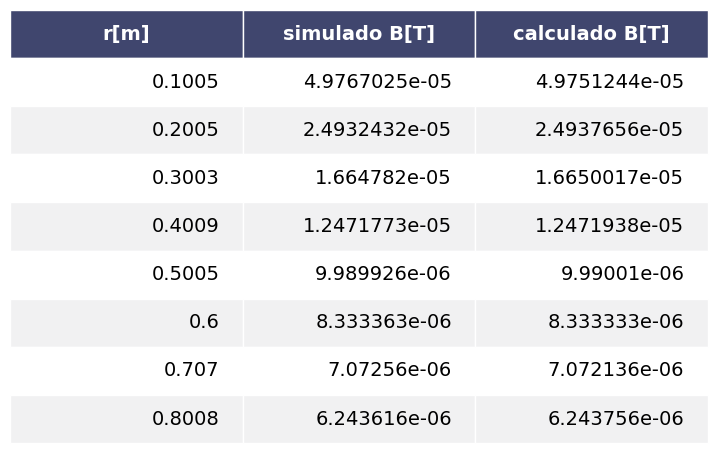

In [19]:
table(df5)

### Para una corriente igual a: $30[A]$

![si](../images/AMP30/Vectores.png)

Creando un objeto de tipo DataFrame, donde se pasa como parámetro un archivo csv que contiene los datos obtenidos. Seguidamente, se calcula el campo magnetico con la fórmula.

In [20]:
df6 = DataFrame(readcsv("../models/30A.csv"))
I3 = 30
for i in range(len(df6)):
    B = (MU * I3) / (2 * PI * df6.loc[i, 'r[m]'])
    df6.loc[i, 'calculado B[T]'] = round(B, 12)

Mostrando la tabla.

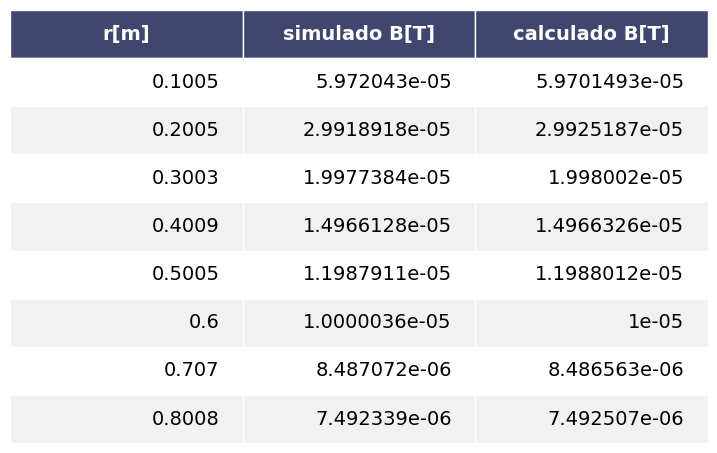

In [21]:
table(df6)

### Gráfica para
### - color verde: $I = 20[A]$
### - color rojo: $I = 25[A]$
### - color azul: $I = 30[A]$

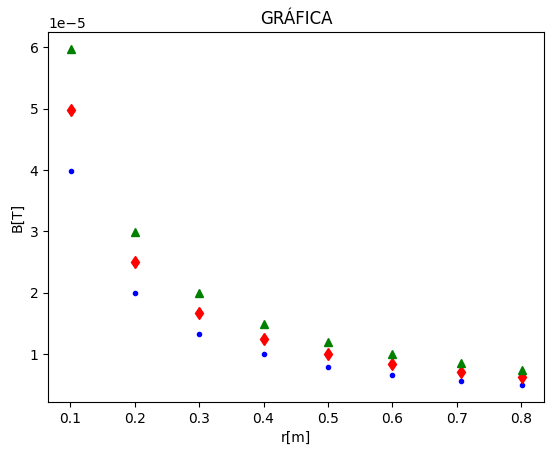

In [22]:
plt.plot(
    df4["r[m]"], df4["calculado B[T]"], 'b.',
    df5["r[m]"], df5["calculado B[T]"], 'rd',
    df6["r[m]"], df6["calculado B[T]"], 'g^',
)
plt.xlabel("r[m]")
plt.ylabel("B[T]")
plt.title("GRÁFICA")
plt.ion()
plt.show()